<a href="https://colab.research.google.com/github/hussein343455/GAN-pytorch-CNN-TensorFlow/blob/main/pre_traind_networks_feature_extraction/comparison_study_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot   
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np
import cv2


Train: X=(4000, 224, 224, 3), y=(4000, 1)
Test: X=(900, 224, 224, 3), y=(900, 1)


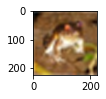

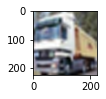

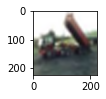

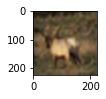

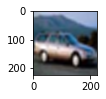

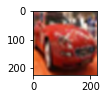

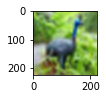

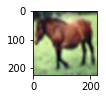

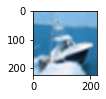

In [ ]:
(trainX_full, trainY_full), (testX_full, testY_full) = cifar10.load_data() 
image_shape=224
trainX=trainX_full[0:4000]
trainY=trainY_full[0:4000]
testX=testX_full[0:900]
testY=testY_full[0:900]
trainX=np.array([cv2.resize(i, (image_shape, image_shape), interpolation=cv2.INTER_CUBIC) for i in trainX])
testX=np.array([cv2.resize(i, (image_shape, image_shape), interpolation=cv2.INTER_CUBIC) for i in testX])

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
for i in range(9):  
  # define subplot
  pyplot.subplot(330 + 1 + i) 
  # plot raw pixel data
  pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))  
  # show the figure
  pyplot.show()  


# trainY=to_categorical(trainY, num_classes=10) #Line 9
# testY=to_categorical(testY, num_classes=10)  #Line 10


In [ ]:
image_input = Input(shape=(image_shape,image_shape, 3))
# baseModel = VGG19(include_top=True,weights='imagenet',input_tensor=image_input)    

# from keras.applications.vgg16 import VGG16
# baseModel = VGG16(weights='imagenet', include_top=True,input_tensor=image_input)

from keras.applications.resnet import ResNet50
baseModel = ResNet50(include_top=True, weights='imagenet', input_tensor=image_input)

# from tensorflow.keras.applications import MobileNetV2
# baseModel = MobileNetV2(include_top=True,weights='imagenet',input_tensor=image_input)

baseModel.summary() 


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout,Dense
from tensorflow.keras.models import Model
headModel = baseModel.layers[-2].output
model = Model(inputs=baseModel.input, outputs=headModel)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

trainY_hot=to_categorical(trainY)
testY_hot=to_categorical(testY)

datagen = ImageDataGenerator(zoom_range=0.10,
                         shear_range=0.10,
                         horizontal_flip=True,fill_mode="nearest")
print('Train: X=%s, y=%s' % (trainX.shape, trainY_hot.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY_hot.shape))

Train: X=(4000, 224, 224, 3), y=(4000, 10)
Test: X=(900, 224, 224, 3), y=(900, 10)


In [ ]:
import numpy as np
Features_train0= model.predict(trainX) 
Features_test0= model.predict(testX) 

Features_train=np.reshape(Features_train0,(4000,-1))
Features_test=np.reshape(Features_test0,(900,-1))

trainY=np.reshape(trainY,(-1))
testY=np.reshape(testY,(-1))
print('Train: X=%s, y=%s' % (Features_train.shape, trainY.shape))
print('Test: X=%s, y=%s' % (Features_test.shape, testY.shape))


Train: X=(4000, 1280), y=(4000,)
Test: X=(900, 1280), y=(900,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
m=["linear","rbf","poly","sigmoid"]
for im in m:
  # ["linear","rbf","poly","sigmoid"]
  classifier = SVC(kernel=im)
  classifier.fit(Features_train, trainY)

  Y_pred = classifier.predict(Features_test)
  cm = confusion_matrix(testY, Y_pred)
  accuracy = float(cm.diagonal().sum()) / len(testY)
  print("\nAccuracy Of SVM For The Given Dataset : ",im , accuracy)


Accuracy Of SVM For The Given Dataset :  linear 0.42

Accuracy Of SVM For The Given Dataset :  rbf 0.47

Accuracy Of SVM For The Given Dataset :  poly 0.49

Accuracy Of SVM For The Given Dataset :  sigmoid 0.42444444444444446


In [ ]:
#Training logistic regression  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr= LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(Features_train,trainY)

predictions=lr.predict(Features_test)
cm = confusion_matrix(testY, predictions)
print("Accuracy Score for LogisticRegression :",float(cm.diagonal().sum()) / len(testY))

Accuracy Score for LogisticRegression : 0.4488888888888889


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier  # For Classification
from sklearn.ensemble import AdaBoostRegressor  # For Regression
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
# classifier = SVC(kernel='linear')
cl = AdaBoostClassifier(n_estimators=100, base_estimator=dtree, learning_rate=6)
cl.fit(Features_train, trainY)
y_pred = cl.predict(Features_test)
# evaluate predictions
accuracy = accuracy_score(testY, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 25.67%
